<a href="https://colab.research.google.com/github/juanmed/coursera_tensorflow/blob/master/ex3_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding and playing with convolutions and pooling

## Introduction

A convolution is a mathematical operation on two functions (f and g) to produce a third function that expresses how the shape of one is modified by the other [1]. Fast forward to their application for computer vision, they are vastly used to "modify" an input image and "extract" features or characteristic of the image that are useful. 

## Convolutions

In this notebook a very explicit understand of how neural networks operate will be developed. However, let's first develop some intuition on what do we mean by "modify" and "extract" features of an image.


In [0]:
# Import libraries
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

# load image
img = misc.ascent()

## Original Image

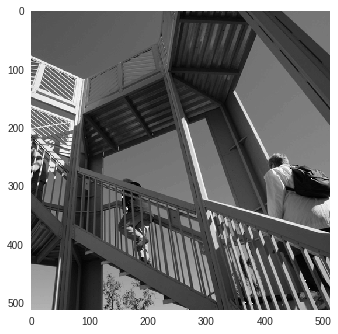

In [0]:
# Display the image
plt.grid(False)
plt.gray()
plt.imshow(img)
plt.show()


## Create the convolution kernel/filter

The kernel is simply the square matrix that will be moved along the width and height of the image, and its values will be multiplied by the values of the pixels of the images to obtain the result (of the convolution).

Defining the size and values of a filter is a science: signal procesing. However, in machine learning  and, in particular in neural networks, these values are also learnt by the network during training, so that their definition is not an issue we face.

However, to understand this concept it is nice to see the effect of known kernels over images... and play with our own values. One thing to have in mind is that, it is useful that the sum of all the values in the kernel be 0 or 1. In order to ensure this, we will extract the sum of all values in the "weight" variable, and divide the result of the convolution by "weight" to enforce this.

In [0]:
# Define kernel

# Vertical lines filter
#kernel = np.array([[-1,-2,-1],
#                   [0, 0, 0],
#                   [1, 2, 1]]) 

#
#kernel = np.array([[0, 1, 0],
#                   [1, -4, 1],
#                   [0, 1, 0]]) 

#
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

weight = np.sum(kernel)

if (weight == 0):
  weight = 1.0
print(weight)

1.0


## Convolute the image and kernel, and apply ReLU Activation

Now that we have the input image and have defined a kernel, we can proceed to perform the convolution operation between the image and kernel.

This means iterating over all the rows of the image. For each row, we will multiply all the values that concide between the kernel and the image, and the result will be stored in a "modified" image. This result is a "feature". 

Remember that, since the kernel is a 3x3 matrix, we cannot start from the first row and first column, we should leave one row and column for the kernel to "fit" in the image. Also, we cannot finish at the last row and last column: again, we should stop in the before-to-last row and column.

Finally, we apply a ReLU activation function to the result of performing each convolution operation. ReLU = f(x) = max(0,x). So basically we change any negative value to 0, and positive values remains the same. One detail is that for RGB images, the maximum value is 255, so we should also limit the results to this value.

In [0]:
# Define a new array to store the new "modified" image
mod_img = np.zeros_like(img)

# get dimensions 
print("Original image dimensions")
img_rows = img.shape[0]
img_columns = img.shape[1]

print("Image rows:    {}".format(img_rows))
print("Image columns: {}".format(img_columns))

# define list of rows and columns our kernel will be convoluted on
# subtract 1 at the beginning and end
conv_rows = range(1, img_rows - 1)  
conv_cols = range(1, img_columns - 1)

for row in conv_rows:
  for col in conv_cols:
    conv = 0.0
    conv = conv + (img[row-1, col-1] * kernel[0][0])
    conv = conv + (img[row-1, col ]  * kernel[0][1])
    conv = conv + (img[row-1, col+1] * kernel[0][2])
    
    conv = conv + (img[row  , col-1] * kernel[1][0])
    conv = conv + (img[row  , col  ] * kernel[1][1])
    conv = conv + (img[row  , col+1] * kernel[1][2])

    conv = conv + (img[row+1, col-1] * kernel[2][0])
    conv = conv + (img[row+1, col  ] * kernel[2][1])
    conv = conv + (img[row+1, col+1] * kernel[2][2])
    conv = conv/weight
    # we need to limit the values. Remember 0 < pixel value < 255,
    # This also corresponds to RELU activation
    if(conv < 0):
      conv = 0
    elif(conv>255):
      conv = 255
    else:
      pass # the value is within range
    
    mod_img[row, col] = int(conv) # the result could be a flot, so convert to integer


Original image dimensions
Image rows:    512
Image columns: 512


### Plot the convoluted image


Convoluted image dimensions (512, 512)


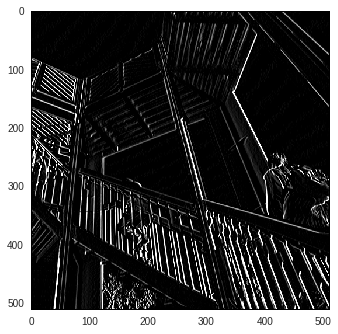

In [0]:
print("Convoluted image dimensions {}".format(mod_img.shape))
plt.gray()
plt.grid(False)
plt.imshow(mod_img)
plt.show()

## WOW! 
You see now the "extracted" features are all the sharp lines in the image. More specifically the vertical lines  seem to be enhanced, and horizontal lines seem to have disappeared. The reason for this is that the filter used was designed to enhance the vertical "features" of the input image.

The dimensions of the image were conserved after convolution because we used the dimensions of the original image to create the new image holder. However we know that the first and last row, and the first and last column were not convoluted (the filter does not fit) and thus should be dropped.



## Pooling

The idea behind "pooling" is simply to extract the maximum value of pixels inside a window. Just like when convoluting the image and kernel, the pooling operation also requires traversing the rows and columns of the image, but this time extracting the maximum value.

If the window is of size 2x2, we will picking the maximum value of the image pixels inside it, and assigning that value to the result. This means that for every 2 columns, we will end with only 1 column, and for every 2 rows, we will end up only with 1 row. In other words, the output has half the rows and columns of the input image.


In [0]:
# create a place to save the new image
new_rows = img_rows//2
new_cols = img_columns//2
pool_img = np.zeros((new_rows, new_cols))   # use integer division "//"

stride = 2
for row in range(0, img_rows, stride):
  for col in range(0, img_columns, stride):
    pixels = []
    pixels.append(mod_img[row ,  col  ])
    pixels.append(mod_img[row ,  col+1])
    pixels.append(mod_img[row+1, col  ])
    pixels.append(mod_img[row+1, col+1])
    pool_img[row//2, col//2] = max(pixels)

Pooling output shape: (256, 256)


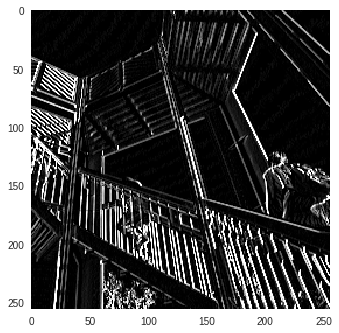

In [0]:
# Plot the image after pooling
print("Pooling output shape: {}".format(pool_img.shape))
plt.gray()
plt.grid(False)
plt.imshow(pool_img)
plt.show()

Notice the size of the output image: 256 x 256 pixels. This is exactly half the size of the input image. And although the size has been reduced by 4 times (2x2), the features are still present and clear.


This is the end. Thanks!

## References
[1] https://en.wikipedia.org/wiki/Convolution
[2] http://cs231n.github.io/convolutional-networks/
